In [2]:
def toIntList(test_list):
    for i in range(0, len(test_list)): 
        test_list[i] = int(test_list[i]) 
    return test_list

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [4]:
raceEthnicity = pd.read_csv('COVID-19_Cases_and_Deaths_by_Race_Ethnicity.csv')

In [19]:
raceEthnicity

,Date updated,Race/ethnicity,Total population,Total cases,Crude case rate per 100k,Age adjusted case rate per 100k,Total deaths,Crude death rate per 100k,Age adjusted death rate per 100k
0,04/20/2020,Hispanic,589809.0,2269,385.0,NaN,109,18.0,NaN
1,04/20/2020,NH Asian,187532.0,215,115.0,NaN,14,7.0,NaN
2,04/20/2020,NH Black,387134.0,1823,471.0,NaN,184,48.0,NaN
3,04/20/2020,NH Other,0.0,118,0.0,NaN,11,0.0,NaN
4,04/20/2020,NH White,2408190.0,5101,212.0,NaN,845,35.0,NaN
...,...,...,...,...,...,...,...,...,...
1137,11/19/2020,NH Black,387134.0,9786,2527.0,2536.0,699,181.0,211.0
1138,11/19/2020,NH Multiracial,NaN,1154,NaN,NaN,38,NaN,NaN
1139,11/19/2020,NH Other,NaN,2287,NaN,NaN,24,NaN,NaN
1140,11/19/2020,NH White,2408190.0,32839,1363.0,1183.0,3527,146.0,80.0


In [5]:
IncomeData = pd.read_csv('IncomeData.csv', header=None)
CtTowns = pd.read_csv('COVID-19_Tests__Cases__and_Deaths__By_Town_.csv',index_col=2)
popTowns = pd.read_csv('pop_towns2019.csv',index_col =0 )

# Income Data of Towns in CT
- I was able to get Income Data of Ct from 'portal.ct.gov' but the latest data is back from 2015. I think that the Income couldve changed in the towns a fair bit but not too much that would render this data useless. I personally believe this data will work just fine.
- The Data has 4 columns: Towns, Median household income, Mean household income and Per capita income. Personally I am most intresterd in the per capita income becausue it shows how much every person in the household has to spend on thing i.e. medical bills for Covid-19. I'm still going to go through all of the columns incase I see varying results


In [6]:
IncomeData.columns = IncomeData.iloc[4]

In [7]:
IncomeData = IncomeData[6:]

In [8]:
IncomeData.head(10)

4,Towns,MedianHouseholdIncome,MeanHouseholdIncome,PerCapitaIncome
6,Andover,100321,111230,40182
7,Ansonia,43305,62858,24359
8,Ashford,77870,95339,39139
9,Avon,123894,172245,66822
10,Barkhamsted,95735,102210,40156
11,Beacon Falls,83155,94002,37736
12,Berlin,87810,104448,40865
13,Bethany,97254,112461,42397
14,Bethel,92125,113515,43569
15,Bethlehem,84306,114218,43516


In [9]:
IncomeData['PerCapitaIncome']

6      40182
7      24359
8      39139
9      66822
10     40156
       ...  
170    34035
171    34468
172    58594
173    46853
174    35502
Name: PerCapitaIncome, Length: 169, dtype: object

In [10]:
CtTownsClean = CtTowns.loc[CtTowns['LastUpdateDate'] == '11/19/2020']

In [11]:
per1kCases = []
for x,y in popTowns.iterrows():
    per1kCases.append(CtTownsClean.loc[x]['TotalCases']/(int(popTowns.loc[x])/1000))

In [12]:
per1kDeaths = []
for x,y in popTowns.iterrows():
    per1kDeaths.append(CtTownsClean.loc[x]['TotalDeaths']/(int(popTowns.loc[x])/1000))

In [13]:
CtData = pd.DataFrame({'Town':list(IncomeData['Towns']),'PerCapitaIncome':toIntList(list(IncomeData['PerCapitaIncome'])),
                      'MedianIncome':toIntList(list(IncomeData['MedianHouseholdIncome'])),
                                           'MeanIncome':toIntList(list(IncomeData['MeanHouseholdIncome'])),
                                          'Per1kCases':per1kCases,'Per1kDeaths':per1kDeaths})

In [14]:
CtData.set_index('Town')

,PerCapitaIncome,MedianIncome,MeanIncome,Per1kCases,Per1kDeaths
Town,,,,,
Andover,40182,100321,111230,8.961681,0.000000
Ansonia,24359,43305,62858,32.647153,0.536078
Ashford,39139,77870,95339,9.870740,0.470035
Avon,66822,123894,172245,18.986649,2.790545
Barkhamsted,40156,95735,102210,13.865779,0.000000
...,...,...,...,...,...
Windsor Locks,34035,68944,82986,20.382760,1.711529
Wolcott,34468,80323,95089,26.828239,0.542594
Woodbridge,58594,133412,166416,23.657143,3.885714


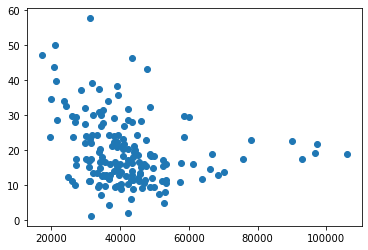

In [15]:
plt.plot(CtData['PerCapitaIncome'],CtData['Per1kCases'],'o')
plt.show()

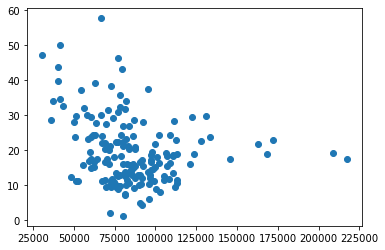

In [16]:
plt.plot(CtData['MedianIncome'],CtData['Per1kCases'],'o')
plt.show()

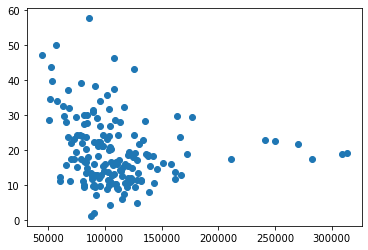

In [18]:
plt.plot(CtData['MeanIncome'],CtData['Per1kCases'],'o')
plt.show()

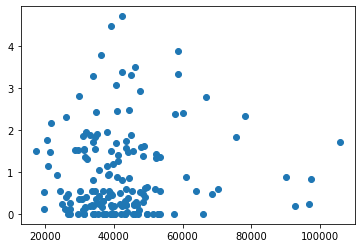

In [210]:
plt.plot(CtData['PerCapitaIncome'],CtData['Per1kDeaths'],'o')
plt.show()

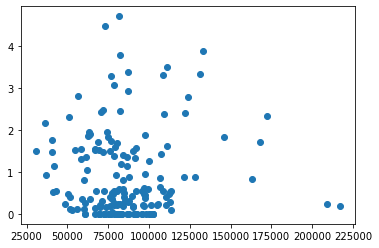

In [211]:
plt.plot(CtData['MedianIncome'],CtData['Per1kDeaths'],'o')
plt.show()

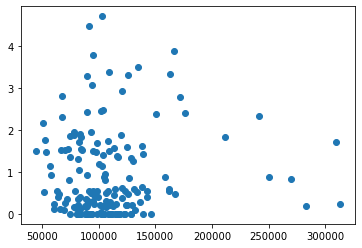

In [212]:
plt.plot(CtData['MeanIncome'],CtData['Per1kDeaths'],'o')
plt.show()